# **Task 4: To Explore Decision Tree Algorithm.**

## **Problem Statement:**
For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Import Required Libraries.**

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Load the Dataset**

In [5]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Sparks Intern/Task 3/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


This indicates that our data is loaded successfully.


## **Variable Identification and Data Information**

By looking at the data we say the<br>
**Numeric Variables:**
* Id
* SepalLenghtCm
* SepalWidthCm
* PetalLenghtCm
* PetalWidthCm

**Categorical Variables:**
* Species




In [6]:
# Let's get the length of the data.
data.shape

(150, 6)

The dataset contains of 150 entries(rows) and 6 columns.

In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* **Checking for missing values**

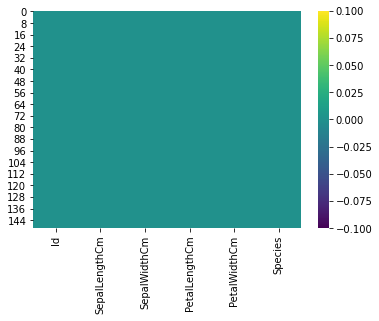

In [9]:
sns.heatmap(data.isnull(),cmap='viridis',annot= False)

**Observations:** Above figure clearly shows that the dataset does not contain any missing values.

In [10]:
#Set index as Id
data.set_index('Id',inplace = True)

## **Exploratory Data Analysis.**

**Univariate Analysis:Numeric**

CPU times: user 71.5 ms, sys: 524 µs, total: 72 ms
Wall time: 72.4 ms


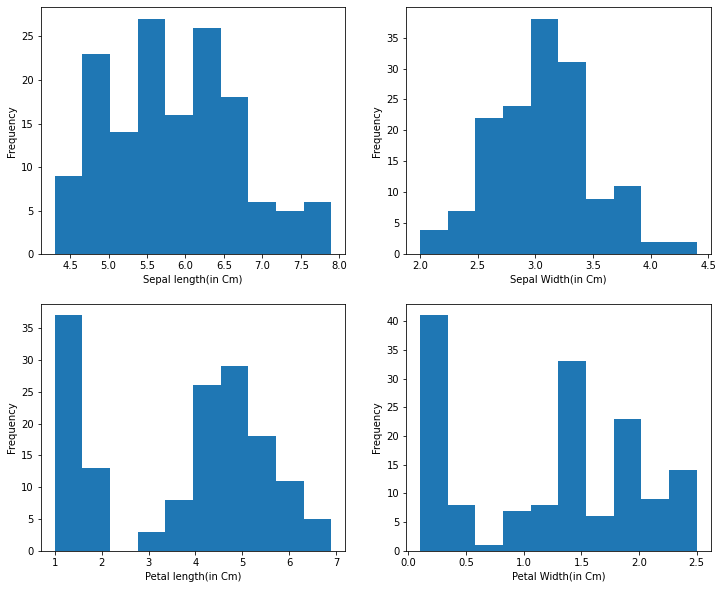

In [11]:
%%time
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.hist(data['SepalLengthCm'])
plt.xlabel('Sepal length(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(data['SepalWidthCm'])
plt.xlabel('Sepal Width(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(data['PetalLengthCm'])
plt.xlabel('Petal length(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(data['PetalWidthCm'])
plt.xlabel('Petal Width(in Cm)')
plt.ylabel('Frequency')


**Observation:**
* Maximum data has sepal length lies between 4.5-6.5
* Most of the data points has sepal width between 2.5 to 3.5
* There are only few data points having petal length between 2-3 and of the data has petal length between 4-5-5.5 
* Petal width is not uniformly distributed.


**Univariate Analysis:Categoical**

Text(0.5, 1.0, 'Value counts \nIris-virginica     50\nIris-setosa        50\nIris-versicolor    50\nName: Species, dtype: int64')

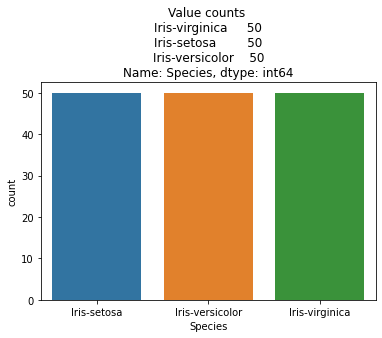

In [12]:
sns.countplot(x = data['Species'])
plt.title('Value counts \n{}'.format(data['Species'].value_counts()))

**Observations:** All the class labels have equal data points therefore this is a balanced dataset.

**Bivariate Analysis: Numeric-Numeric**

* Now let's find the correlation between the each numerical features.

In [13]:
data.corr(method = 'pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


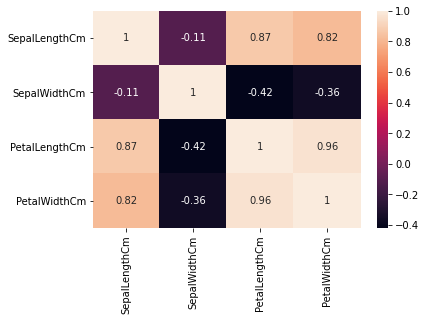

In [14]:
sns.heatmap(data.corr(method = 'pearson'),annot = True,)

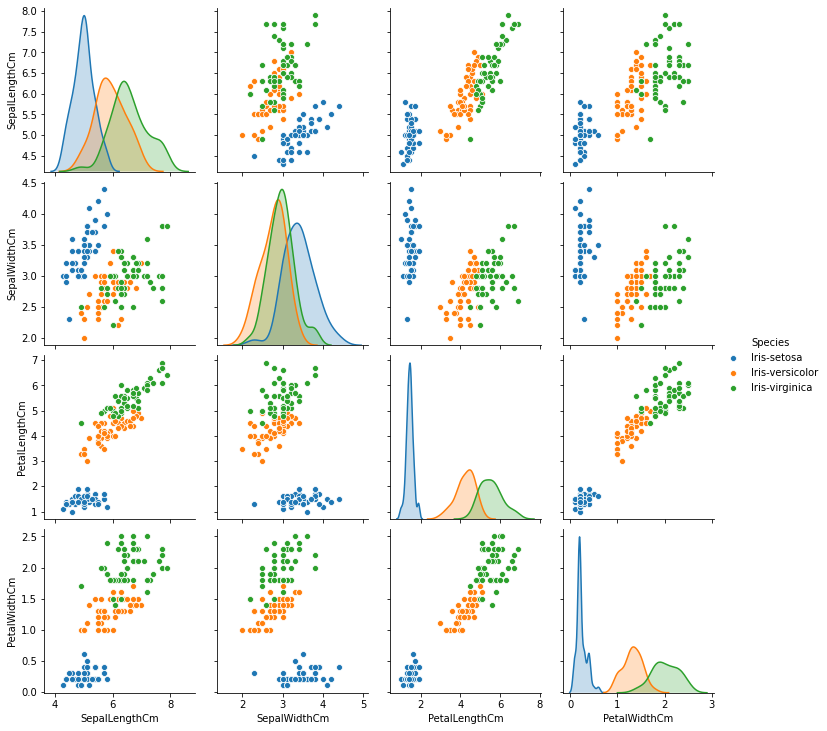

In [15]:
sns.pairplot(data, hue = 'Species',)

**Bivariate Analysis: Numerical- Categorical**

Let's plot the bar chart with of all the numeric features with categorical features

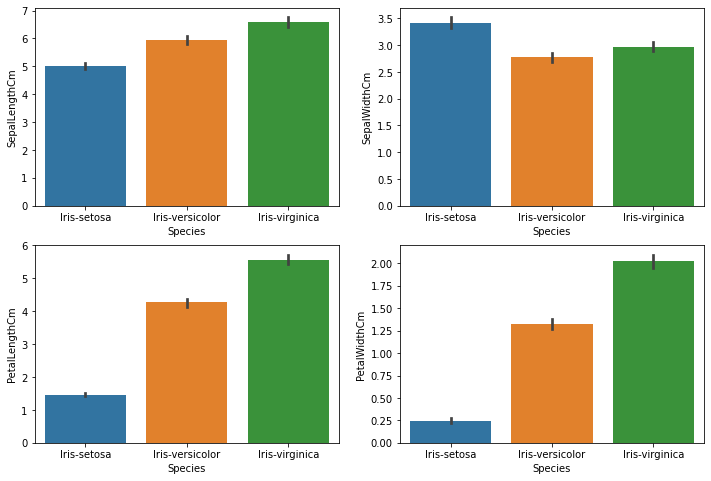

In [16]:
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
sns.barplot(x= 'Species', y = 'SepalLengthCm', data = data)

plt.subplot(2,2,2)
sns.barplot(x= 'Species', y = 'SepalWidthCm', data = data)

plt.subplot(2,2,3)
sns.barplot(x= 'Species', y = 'PetalLengthCm', data = data)

plt.subplot(2,2,4)
sns.barplot(x= 'Species', y = 'PetalWidthCm', data = data)

Observation:
* Iris-Setosa is the species who has highest sepal width but have lowest sepal lenght, petal lenght and petal width than other species. The petal lenght and petal width of this species is somewhere around 1.5cm and 0.25 cm respectively where as other species have much more than this.
* Verginica is the species which has the highest Sepal lenth, petal length and petal width. So we can conclude that the Iris-Verginica is the weighted species.

From the above plots we make one inference on the weight of the species are in the order.<br>
<center>**Iris-VerginicaWeight > Iris-VersiclorWeight > Iris-SetosaWeight**</center>

## **Decision Tree classifier**


Before applying the algorithm let's split he dataset into the train and test dataset using train_test_split function.
* Train dataset is used for model training while test data set is used for model evaluation and testing.

In [19]:
from sklearn.model_selection import train_test_split
X = data.drop('Species', axis =1)
Y = data['Species']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = .30, random_state = 42)
print('X_train \n',X_train,'\n')
print('X_test \n',X_test,'\n')
print('y_train \n',y_train,'\n')
print('y_test \n',y_test)

X_train 
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
82             5.5           2.4            3.7           1.0
134            6.3           2.8            5.1           1.5
138            6.4           3.1            5.5           1.8
76             6.6           3.0            4.4           1.4
110            7.2           3.6            6.1           2.5
..             ...           ...            ...           ...
72             6.1           2.8            4.0           1.3
107            4.9           2.5            4.5           1.7
15             5.8           4.0            1.2           0.2
93             5.8           2.6            4.0           1.2
103            7.1           3.0            5.9           2.1

[105 rows x 4 columns] 

X_test 
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
74             6.1       

In [20]:
# Import DecisionTree function from sklearn
from sklearn.tree import DecisionTreeClassifier

#Let's create an object
dt_clf = DecisionTreeClassifier()

# Now train the model 
dt_clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

* ### Let us visualize the Decision Tree to understand it better.**bold text**

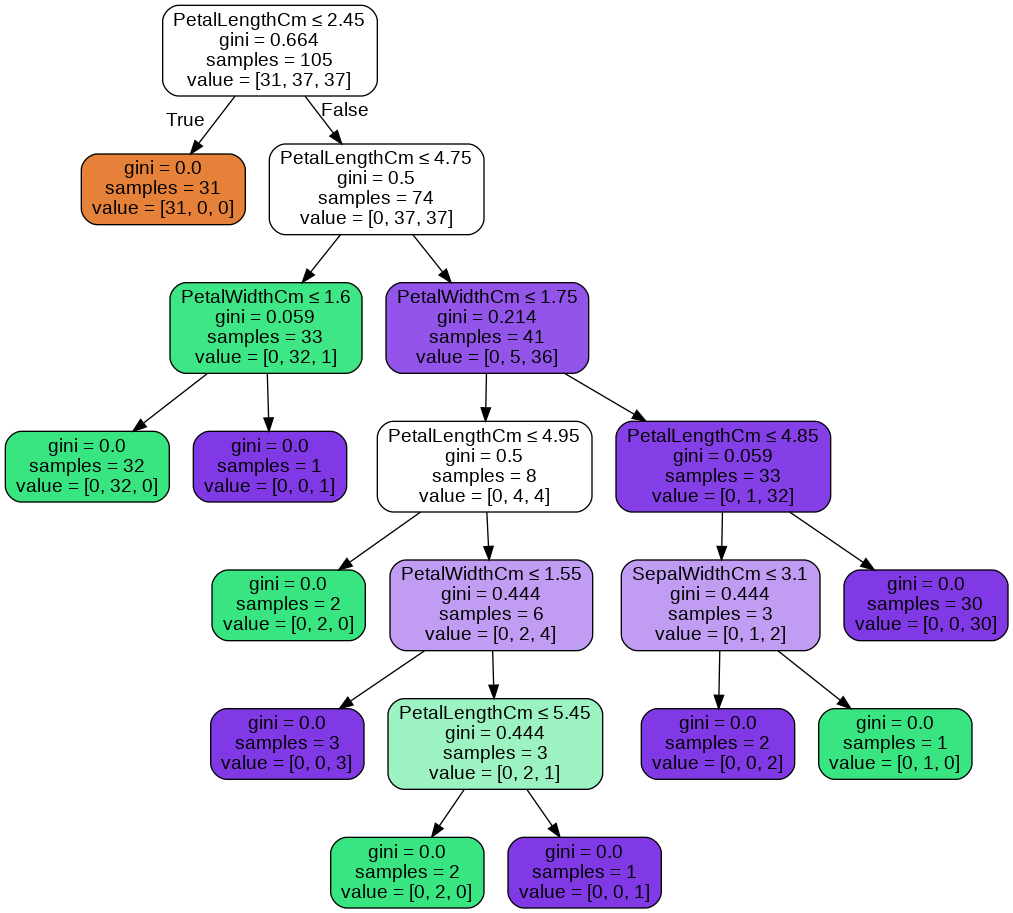

In [26]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
features = list(data.columns[:-1])
export_graphviz(dt_clf, out_file=dot_data, feature_names=features,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## **Model Prediction and Evaluation**

In [28]:
# Model prediction on test data.
y_pred = dt_clf.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [30]:
# MOdel Prediction
from sklearn.metrics import accuracy_score

train_score = dt_clf.score(X_train,y_train)
test_score = dt_clf.score(X_test,y_test)
acc_score = accuracy_score(y_test,y_pred)

print('Training Score : ',train_score)
print('Test score : ',test_score)
print('Acuracy score : ', acc_score)

Training Score :  1.0
Test score :  1.0
Acuracy score :  1.0


## * The training score and test score of the model is 1.0 i.e the model gives 100% accuracy.
## * When we evaluate our model on test dataset after prediction we find that the accuracy score of our model is 100%.
# Now we conclude that our model is well generalized model.

# **Thank You!**